<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Exploración-inicial-de-nuestros-datos" data-toc-modified-id="Exploración-inicial-de-nuestros-datos-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Exploración inicial de nuestros datos</a></span><ul class="toc-item"><li><span><a href="#Tipado-de-datos" data-toc-modified-id="Tipado-de-datos-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Tipado de datos</a></span></li><li><span><a href="#Tamaño" data-toc-modified-id="Tamaño-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Tamaño</a></span></li><li><span><a href="#Tipos-de-datos" data-toc-modified-id="Tipos-de-datos-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Tipos de datos</a></span></li><li><span><a href="#Info" data-toc-modified-id="Info-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Info</a></span></li><li><span><a href="#Principales-estadísticos" data-toc-modified-id="Principales-estadísticos-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Principales estadísticos</a></span></li><li><span><a href="#Duplicados" data-toc-modified-id="Duplicados-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Duplicados</a></span></li><li><span><a href="#Valores-nulos" data-toc-modified-id="Valores-nulos-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Valores nulos</a></span></li><li><span><a href="#Outliers" data-toc-modified-id="Outliers-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Outliers</a></span></li><li><span><a href="#Exploración-de-variables-categóricas" data-toc-modified-id="Exploración-de-variables-categóricas-1.9"><span class="toc-item-num">1.9&nbsp;&nbsp;</span>Exploración de variables categóricas</a></span></li></ul></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
import sidetable

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data/netflix_originals.csv", index_col = 0)
df.head(2)

,years,genres,IMDB,runtime,description,stars,number of votes,type,original plataform
Titles,,,,,,,,,
Zumbo's Just Desserts,2016,Reality-TV,6.9,52 min,Amateur Australian chefs compete to impress pa...,"Gigi Falanga, Rachel Khoo, Adriano Zumbo","1,779",TV Show,Netflix
Zona Rosa,2019,Comedy,6.0,NaN,Add a Plot,"Ray Contreras, Pablo Morán, Manu Nna, Ana Juli...",33,TV Show,Netflix


>🚨 Como podemos ver lo primero que llama nuestra atención es que **`titles` está en el índice**. 

# Exploración inicial de nuestros datos

En este apartado tendremos que evaluar los distintos puntos: 

- Tipado de columnas


- Tamaño


- Tipos de los datos


- Info


- Principales estadísticos (describe)


- Duplicados


- Nulos


- Outliers

 
- Exploración de variables categóricas

## Tipado de datos

Exploramos como están nombradas nuestras columnas.

In [3]:
df.columns

Index(['years                ', 'genres     ', 'IMDB', 'runtime',
       'description', 'stars', 'number of votes', 'type',
       'original plataform'],
      dtype='object')

>🚨 Vemos como los nombres **no son homogéneos** y eso nos puede dificultar nuestro trabajo. 

## Tamaño 

¿Cuál es el tamaño del *dataframe*? 

In [4]:
# tenemos un dataframe que tiene 1517 filas y 10 columnas. 

df.shape

(1517, 9)

## Tipos de datos 

¿Y el tipo de datos de cada una de las columnas?

In [5]:
# tipos de datos
df.dtypes

years                      int64
genres                    object
IMDB                     float64
runtime                   object
description               object
stars                     object
number of votes           object
type                      object
original plataform        object
dtype: object

> 🚨 Oh oh... No tiene mucho sentido que el número de votos, runtime y years sean un *string*... Tendremos que hacer algo con ellas más adelante. 


## Info

Hagamos una exploración de las variables

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1517 entries, Zumbo's Just Desserts to 13th: A Conversation with Oprah Winfrey & Ava DuVernay
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   years                  1517 non-null   int64  
 1   genres                 1516 non-null   object 
 2   IMDB                   1512 non-null   float64
 3   runtime                1276 non-null   object 
 4   description            1517 non-null   object 
 5   stars                  1489 non-null   object 
 6   number of votes        1516 non-null   object 
 7   type                   1517 non-null   object 
 8   original plataform     1517 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 118.5+ KB


## Principales estadísticos

Recordamos que el método `describe` nos devuelve por defecto las variables numéricas

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
years,1517.0,2018.145023,1.858819,2001.0,2017.0,2018.0,2020.0,2020.0
IMDB,1512.0,6.685516,1.100915,2.4,6.0,6.8,7.5,9.3


Vemos como tenemos dos variables numéricas, `years` e `imdb`. Esta tabla nos muestra cuáles son sus valores medios, desviación estándar, los valores máximos y mínimos y sus percentiles.  

Pero ojo!! También podemos incluir las categóricas

In [8]:
df.describe(include = "object").T

,count,unique,top,freq
genres,1516,247,Comedy,317
runtime,1276,182,30 min,84
description,1517,1474,Add a Plot,42
stars,1489,1464,"Nat Faxon, Jay Gragnani, Ramone Hamilton, Sean...",3
number of votes,1516,1335,95,6
type,1517,2,TV Show,1012
original plataform,1517,1,Netflix,1517


Aquí podemos ver el número de valores únicos que tenemos en cada variable. La categória que más se repite y la frecuencia con la que aparece esa categória. 

## Duplicados 

¿Tenemos duplicados en nuestro *dataframe*?

In [9]:
df.duplicated().sum()

2

> 🚨 Vemos como tenemos **dos valores que están duplicados** en nuestro dataframe. 

## Valores nulos

In [10]:
df.isnull().sum()

years                      0
genres                     1
IMDB                       5
runtime                  241
description                0
stars                     28
number of votes            1
type                       0
original plataform         0
dtype: int64

¿Cuántos valores nulos tenemos? Lo sacaremos en porcentaje

In [11]:
# % de nulos 

(df.isnull().sum() / df.shape[0]) * 100

years                     0.000000
genres                    0.065920
IMDB                      0.329598
runtime                  15.886618
description               0.000000
stars                     1.845748
number of votes           0.065920
type                      0.000000
original plataform        0.000000
dtype: float64

> 🚨 Tenemos 5 columnas con valores nulos. En la columna `runtime` es la que encontramos mayor porcentaje de nulos, con casi un 16% de los datos nulos. En las otras columnas, `imbd`, `stars` y `votes` tenemos entre un 0-1% de los datos nulos. 

**Sidetable** 

🔝 Un poquito de fantasía. 

Es una librería que nos va a construir una tabla de frecuencias de las variables categóricas y un resumen de los valores nulos de un dataframe.

Resumiendo, es un super value_counts. 

Lo primero que tenemos que hacer es instalarnos la librería usando pip

```
pip install sidetable

pip3 install sidetable
```
```python
import sidetable
```
Tenemos dos métodos principales dentro de esta librería:

- `freq()`


- `missing()`


Vamos a sacar la frecuencia de cada una de las etiquetas de la variable `genres`

In [13]:
df.stb.freq(["genres     "])

,genres,count,percent,cumulative_count,cumulative_percent
0,Comedy,317,20.910290,317,20.910290
1,Documentary,126,8.311346,443,29.221636
2,Drama,58,3.825858,501,33.047493
3,Reality-TV,50,3.298153,551,36.345646
4,"Comedy, Drama",41,2.704485,592,39.050132
...,...,...,...,...,...
242,"Action, Comedy, Romance",1,0.065963,1512,99.736148
243,"Action, Adventure, Sci-Fi",1,0.065963,1513,99.802111
244,"Action, Adventure, Horror",1,0.065963,1514,99.868074
245,"Action, Adventure, Family",1,0.065963,1515,99.934037


> 🚨 Esta tabla nos está mostrando cada una de las etiquetas que tenemos para esta columa. Nos muestra además el número de veces que aparece cada una de ellas (`count`), el pocentaje sobre el total de datos que tenemos (`percent`). Y aquí podemos ver algo interesante, como el 20% de los datos pertenecen a la etiquetas "Comedy" seguido muy de lejos de la etiquetas "Documentary" con solo un 8%. 
>
> Lo interesante de esta librería es que nos da el conteo acumulado y el porcentaje acumulado. 

Además podemos "filtrar" nuestro resultado anterior y especificar un umbral (`thresh`). Por ejemplo, si indicamos este parámetro en 60, nos devolverá aquellas etiquetas que conformen el 60% de los datos de nuestro *dataframe*. El resto de las etiquetas nos las pondrá en una única categoría que nombrará como `others`. 

In [14]:
df.stb.freq(["genres     "], thresh=60)


,genres,count,percent,cumulative_count,cumulative_percent
0,Comedy,317,20.910290,317,20.910290
1,Documentary,126,8.311346,443,29.221636
2,Drama,58,3.825858,501,33.047493
3,Reality-TV,50,3.298153,551,36.345646
4,"Comedy, Drama",41,2.704485,592,39.050132
5,"Documentary, Crime",40,2.638522,632,41.688654
6,"Documentary, Comedy",31,2.044855,663,43.733509
7,"Animation, Action, Adventure",28,1.846966,691,45.580475
8,"Comedy, Romance",24,1.583113,715,47.163588
9,"Comedy, Drama, Romance",24,1.583113,739,48.746702


> 🚨 Como podemos ver, tenemos 19 etiquetas de un total de 609 valores únicos que constituyen el 60% de nuestros datos.  

Podemos, además, incluir dos variables categóricas en este método. En el ejemplo, estamos aplicando el método para `genres` y `type`. 

In [15]:
df.stb.freq(["genres     ", "type"])

,genres,type,count,percent,cumulative_count,cumulative_percent
0,Comedy,TV Show,275,18.139842,275,18.139842
1,Documentary,Movie,65,4.287599,340,22.427441
2,Documentary,TV Show,61,4.023747,401,26.451187
3,Reality-TV,TV Show,50,3.298153,451,29.749340
4,Comedy,Movie,42,2.770449,493,32.519789
...,...,...,...,...,...,...
320,"Action, Adventure, Sci-Fi",Movie,1,0.065963,1512,99.736148
321,"Action, Adventure, Horror",Movie,1,0.065963,1513,99.802111
322,"Action, Adventure, Fantasy",Movie,1,0.065963,1514,99.868074
323,"Action, Adventure, Family",TV Show,1,0.065963,1515,99.934037


> 🚨 Observamos que la combinación de etiquetas que más se repite en nuestro *dataframe* es "Comedy" de tipo "TV Show" con un 18% de los datos, de nuevo seguido muy de lejos por los "Documentary" de tipo "Movie". 

Por último, podemos incluir dentro de esta herramienta el parámetro `value`, el cual nos va a permitir evaluar cada etiquetas de nuestra variable en función de una variable numérica. En el ejemplo lo haremos con las variables `genres` e `imdb`. 

In [17]:
df.stb.freq(["genres     "], value = 'IMDB', thresh = 60)

,genres,IMDB,percent,cumulative_IMDB,cumulative_percent
0,Comedy,2042.4,20.215978,2042.4,20.215978
1,Documentary,897.0,8.878639,2939.4,29.094616
2,Drama,388.3,3.843451,3327.7,32.938067
3,Reality-TV,334.0,3.305981,3661.7,36.244049
4,"Documentary, Crime",294.8,2.917974,3956.5,39.162023
5,"Comedy, Drama",284.0,2.811074,4240.5,41.973097
6,"Documentary, Comedy",206.9,2.047927,4447.4,44.021024
7,"Animation, Action, Adventure",200.2,1.981609,4647.6,46.002633
8,"Crime, Drama, Mystery",156.8,1.552030,4804.4,47.554663
9,"Comedy, Drama, Romance",155.4,1.538172,4959.8,49.092835


> 🚨 ¿Qué nos muestra esta tabla? No muestra que la suma de todas las valoraciones de `imbd` para la etiqueta "Comedy" es de 2042.4. 

El otro método que podemos usar en esta librería es `missing`, el cual nos va a devolver el número de valores nulos que tenemos por columna y nos calculará el porcentaje automaticamente. 

In [18]:
df.stb.missing()

,missing,total,percent
runtime,241,1517,15.886618
stars,28,1517,1.845748
IMDB,5,1517,0.329598
genres,1,1517,0.065920
number of votes,1,1517,0.065920
years,0,1517,0.000000
description,0,1517,0.000000
type,0,1517,0.000000
original plataform,0,1517,0.000000


## Outliers 

In [19]:
# lo primero que haremos será sacar solo las columnas numéricas

numericas = df.select_dtypes(include = np.number)
numericas.head(2)

,years,IMDB
Titles,,
Zumbo's Just Desserts,2016,6.9
Zona Rosa,2019,6.0


/usr/local/Caskroom/miniconda/base/envs/ironhack/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/Caskroom/miniconda/base/envs/ironhack/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


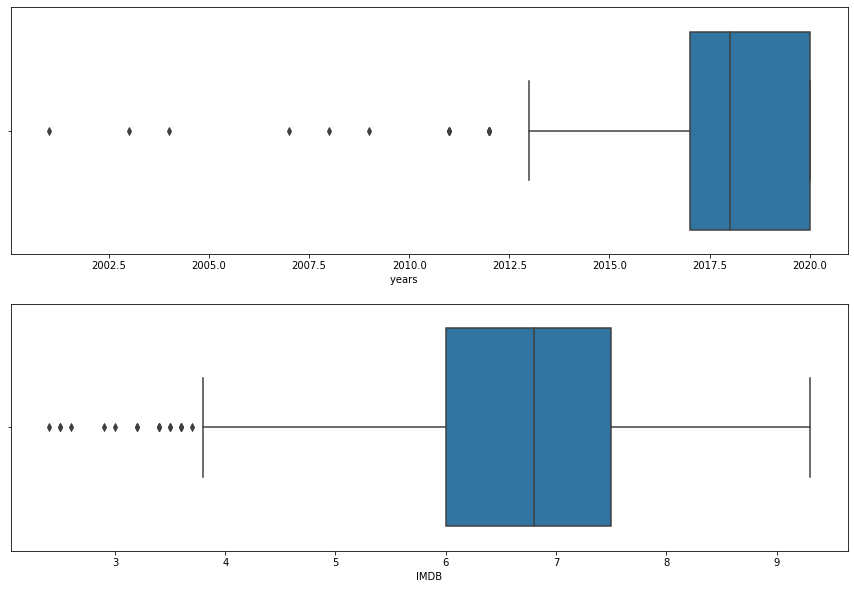

In [20]:
# para visualizar donde están nuestro outliers podemos usar un boxplot. 

fig, axes = plt.subplots(2,1, figsize =(15, 10))

for col in range(len(numericas.columns)):
    sns.boxplot(numericas.columns[col], data = numericas, ax = axes[col])
plt.show()

> 🚨 Recordemos que todos aquellos puntos que se salgan de los bigotes serán outliers. Los bigotes nos indicaban los rangos intercuartilicos. 

> Pero don't panic! No tenemos porque entender esto ahora. Veremos qué es esto y como identificarlos en nuestro *dataframe* en el siguiente módulo. 

## Exploración de variables categóricas

In [21]:
# lo primero que hacemos es extraer unicamente las variables categóricas 

categoricas = df.select_dtypes(include = "object")
categoricas.head(2)

,genres,runtime,description,stars,number of votes,type,original plataform
Titles,,,,,,,
Zumbo's Just Desserts,Reality-TV,52 min,Amateur Australian chefs compete to impress pa...,"Gigi Falanga, Rachel Khoo, Adriano Zumbo","1,779",TV Show,Netflix
Zona Rosa,Comedy,NaN,Add a Plot,"Ray Contreras, Pablo Morán, Manu Nna, Ana Juli...",33,TV Show,Netflix


In [22]:
# printeemos cuáles son los valores únicos de cada columna
for col in categoricas:
    print(f'los valores únicos de {col} son {df[col].value_counts()}')
    print('----------------------')

los valores únicos de genres      son Comedy                       317
Documentary                  126
Drama                         58
Reality-TV                    50
Comedy, Drama                 41
                            ... 
Comedy, Thriller               1
Action, Adventure, Horror      1
Comedy, Drama, Western         1
Action, Horror, Mystery        1
Short, Music                   1
Name: genres     , Length: 247, dtype: int64
----------------------
los valores únicos de runtime son 30 min     84
60 min     82
45 min     42
50 min     33
40 min     31
           ..
360 min     1
452 min     1
629 min     1
136 min     1
139 min     1
Name: runtime, Length: 182, dtype: int64
----------------------
los valores únicos de description son Add a Plot                                                                                                                                                                                                                      42
Jo Koy returns

> 🚨 Esto ya nos está dando alguna señal de que hay columnas que tiene muchos valores únicos y que nos pueden dificultar mucho su análisis, como el caso de la variable `genres`. 

In [23]:
for col in categoricas:
    print(f'los valores únicos de {col} son {len(df[col].unique())}')
    print('----------------------')

los valores únicos de genres      son 248
----------------------
los valores únicos de runtime son 183
----------------------
los valores únicos de description son 1474
----------------------
los valores únicos de stars son 1465
----------------------
los valores únicos de number of votes son 1336
----------------------
los valores únicos de type son 2
----------------------
los valores únicos de original plataform son 1
----------------------


In [24]:
# veamos cual es el porcentaje de valores únicos en cada una de nuestras columnas. 

for col in categoricas:
    print(f'los valores únicos de {col} son {(len(df[col].value_counts())/ df.shape[0]) * 100}')
    print('----------------------')

los valores únicos de genres      son 16.282135794330916
----------------------
los valores únicos de runtime son 11.997363216875412
----------------------
los valores únicos de description son 97.1654581410679
----------------------
los valores únicos de stars son 96.5062623599209
----------------------
los valores únicos de number of votes son 88.00263678312459
----------------------
los valores únicos de type son 0.13183915622940012
----------------------
los valores únicos de original plataform son 0.06591957811470006
----------------------


In [26]:
# veamos cuales son esos valores: 

df["genres     "].unique()

array(['Reality-TV', 'Comedy', 'Crime, Drama, Mystery',
       'Adventure, Reality-TV', 'Crime, Drama, Romance', 'Family',
       'Drama', 'Action, Crime, Drama', 'Documentary, Crime',
       'Animation, Action, Comedy', 'Animation, Family',
       'Drama, Thriller', 'Talk-Show', 'Musical', 'Animation',
       'Action, Drama, Fantasy', 'Animation, Action, Adventure',
       'Drama, Romance', 'Animation, Short, Adventure',
       'Drama, Fantasy, Horror', 'Comedy, Drama, Romance',
       'Documentary, Reality-TV', 'Drama, Horror, Sci-Fi',
       'Comedy, Reality-TV', 'Comedy, Drama',
       'Documentary, Crime, Mystery', 'Documentary',
       'Crime, Drama, Thriller', 'Animation, Action, Sci-Fi',
       'Game-Show, Reality-TV', 'Horror, Thriller', 'Animation, Comedy',
       'Action, Adventure, Fantasy', 'Comedy, Crime, Drama',
       'Documentary, Comedy', 'Adventure, Drama',
       'Drama, Mystery, Sci-Fi', 'Thriller', 'Adventure, Comedy, Crime',
       'Comedy, Crime', 'Documentary, 

> 🚨 Horror!!!! Si pensamos en como mostrar estos resultados podemos pensar que esto puede convertirse en un auténtico dolor. Tendremos que saber como gestionarlo en la fase de análisis. 